<a href="https://colab.research.google.com/github/ruhirani011/Flipkart_Grid_5.0/blob/main/grid5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('grs.csv')
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [7]:
df.isnull().sum().sort_values(ascending = False)

Member_number      0
Date               0
itemDescription    0
dtype: int64

In [8]:
df['date'] = pd.to_datetime(df["Date"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Member_number    38765 non-null  int64         
 1   Date             38765 non-null  object        
 2   itemDescription  38765 non-null  object        
 3   date             38765 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 1.2+ MB


<ipython-input-8-b52eb0972e95>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['date'] = pd.to_datetime(df["Date"])


In [9]:
df.head()

,Member_number,Date,itemDescription,date
0,1808,21-07-2015,tropical fruit,2015-07-21
1,2552,05-01-2015,whole milk,2015-05-01
2,2300,19-09-2015,pip fruit,2015-09-19
3,1187,12-12-2015,other vegetables,2015-12-12
4,3037,01-02-2015,whole milk,2015-01-02


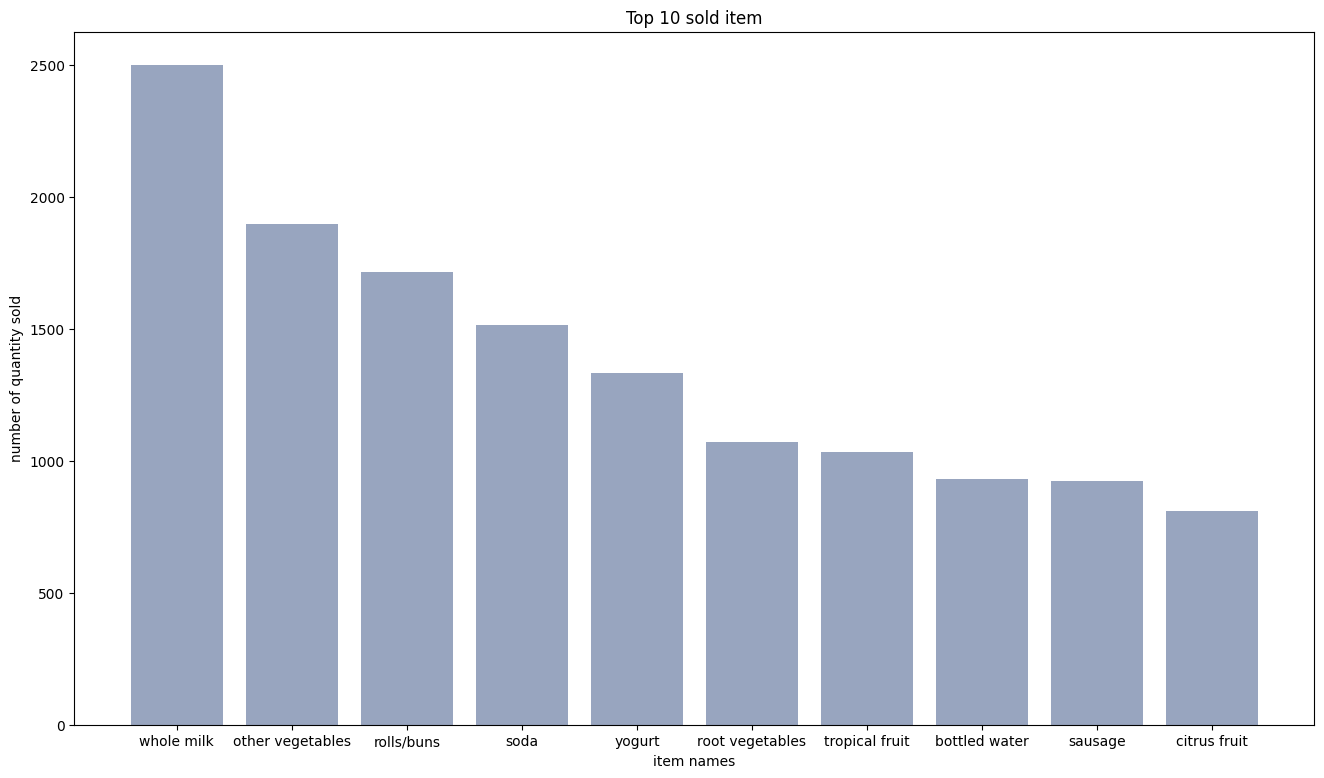

In [12]:
Item_distr = df.groupby(by = 'itemDescription').size().reset_index(name='Frequency').sort_values(by = 'Frequency', ascending = False).head(10)

bars = Item_distr["itemDescription"]
height = Item_distr["Frequency"]
x_pos = np.arange(len(bars))

plt.figure(figsize=(16,9))

plt.bar(x_pos, height, color=(0.2,0.3,0.5,0.5))

plt.title("Top 10 sold item")
plt.xlabel("item names")
plt.ylabel('number of quantity sold')

plt.xticks(x_pos, bars)

plt.show()


In [13]:
df_date = df.set_index(['Date'])
df_date

,Member_number,itemDescription,date
Date,,,
21-07-2015,1808,tropical fruit,2015-07-21
05-01-2015,2552,whole milk,2015-05-01
19-09-2015,2300,pip fruit,2015-09-19
12-12-2015,1187,other vegetables,2015-12-12
01-02-2015,3037,whole milk,2015-01-02
...,...,...,...
08-10-2014,4471,sliced cheese,2014-08-10
23-02-2014,2022,candy,2014-02-23
16-04-2014,1097,cake bar,2014-04-16


In [16]:
cust_level = df[["Member_number", "itemDescription"]].sort_values(by = "Member_number", ascending = False)
cust_level["itemDescription"] = cust_level["itemDescription"].str.strip()
cust_level

,Member_number,itemDescription
3578,5000,soda
34885,5000,semi-finished bread
11728,5000,fruit/vegetable juice
9340,5000,bottled beer
19727,5000,root vegetables
...,...,...
13331,1000,whole milk
17778,1000,pickled vegetables
6388,1000,sausage
20992,1000,semi-finished bread


In [17]:
transactions = [a[1]['itemDescription'].tolist() for a in list(cust_level.groupby(["Member_number"]))]

<ipython-input-17-de37ffb8f6e8>:1: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  transactions = [a[1]['itemDescription'].tolist() for a in list(cust_level.groupby(["Member_number"]))]


In [18]:
pip install apyori

  Preparing metadata (setup.py) ... done
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5956 sha256=4f3c2f6ac6121f39893e8fcbcab81dcf10a8f1ae73d4ab3ede6882ed2c5d88cb
  Stored in directory: /root/.cache/pip/wheels/c4/1a/79/20f55c470a50bb3702a8cb7c94d8ada15573538c7f4baebe2d
Successfully built apyori


In [25]:
from apyori import apriori
rules = apriori(transactions = transactions,min_support = 0.002,min_confidence = 0.05,min_lift=3,min_length = 2, max_length = 3)

In [26]:
results = list(rules)

In [27]:
results

[RelationRecord(items=frozenset({'kitchen towels', 'UHT-milk'}), support=0.002308876346844536, ordered_statistics=[OrderedStatistic(items_base=frozenset({'kitchen towels'}), items_add=frozenset({'UHT-milk'}), confidence=0.30000000000000004, lift=3.821568627450981)]),
 RelationRecord(items=frozenset({'beef', 'potato products'}), support=0.002565418163160595, ordered_statistics=[OrderedStatistic(items_base=frozenset({'potato products'}), items_add=frozenset({'beef'}), confidence=0.4545454545454546, lift=3.8021849395239955)]),
 RelationRecord(items=frozenset({'coffee', 'canned fruit'}), support=0.002308876346844536, ordered_statistics=[OrderedStatistic(items_base=frozenset({'canned fruit'}), items_add=frozenset({'coffee'}), confidence=0.4285714285714286, lift=3.7289540816326534)]),
 RelationRecord(items=frozenset({'domestic eggs', 'meat spreads'}), support=0.0035915854284248334, ordered_statistics=[OrderedStatistic(items_base=frozenset({'meat spreads'}), items_add=frozenset({'domestic egg

In [38]:
def inspect(results):
    lhs = [tuple(result[2][0][0])[0] for result in results]
    rhs = [tuple(result[2][0][1])[0] for result in results]
    supports = [results[1][1] for result in results]
    confidences = [result[2][0][2] for result in results]
    lifts = [result[2][0][3] for result in results]
    return list(zip(lhs, rhs, supports, confidences, lifts))
resultsindataframe = pd.DataFrame(inspect(results),columns = ['Product Added', 'Product Recommended', 'Support', 'Confidences', 'Lift'])



In [39]:
resultsindataframe.nlargest(n=20, columns = "Lift")

,Product Added,Product Recommended,Support,Confidences,Lift
133,canned fish,pip fruit,0.002565,0.069565,7.975448
28,baking powder,specialty bar,0.002565,0.066116,7.579971
160,soups,chicken,0.002565,0.166667,6.838596
8,Instant food products,margarine,0.002565,0.166667,5.459384
230,meat spreads,domestic eggs,0.002565,0.371429,5.284046
242,margarine,specialty chocolate,0.002565,0.307692,5.260459
298,soft cheese,pip fruit,0.002565,0.054422,5.174050
131,canned fish,shopping bags,0.002565,0.069565,5.116325
71,mayonnaise,white bread,0.002565,0.108108,5.077174
146,chewing gum,ham,0.002565,0.320000,5.050040
